In [10]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error

In [11]:
data_display = pd.read_csv("dataset3_pd.csv")

data_display
# y = PD(mm)

,WL1(mm),WL2(mm),WL3(mm),WL4 (mm),WL5 (mm),Solar (W/m2),AirTemp (DegC),RH (%),y
0,53,208,87,36,44,0,21.9,97,-0.1
1,59,62,93,36,50,113,22.3,100,-0.1
2,60,61,93,36,56,152,22.8,100,-0.1
3,58,60,91,36,51,141,23.3,100,-0.1
4,57,61,91,36,48,123,23.6,99,-0.1
...,...,...,...,...,...,...,...,...,...
407,39,42,42,36,44,0,14.5,93,-0.1
408,39,42,42,36,44,0,13.9,99,-0.1
409,39,42,42,36,44,0,14.4,100,-0.1
410,39,42,42,36,44,0,14.6,98,-0.1


In [24]:
learning_rate = 0.0001
trainning_steps = 1000000
display_step = 10000

w_pred = 0

In [25]:
data = np.loadtxt("dataset3_np.csv", delimiter = ',', dtype = np.float32)

x = data[:, :8]
y = data[:, [-1]]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

w1 = tf.Variable(tf.random.uniform([8, 1], 0, 1))
w2 = tf.Variable(tf.random.uniform([8, 1], 0, 1))
bias = tf.Variable(random.random())

In [26]:
def compute_loss():
    hypothesis = tf.matmul(x_train * x_train, w1) + tf.matmul(x_train, w2) + bias
    loss = tf.reduce_mean((y_train - hypothesis) ** 2)
    
    return loss

optimizer = tf.optimizers.Adam(lr = learning_rate)

for step in range(1, trainning_steps + 1):
    optimizer.minimize(compute_loss, var_list = [w1, w2, bias])
    
    if step % display_step == 0:
        print('step:', step, '\n', 'w1:\n', w1.numpy(), '\n', 'w2:\n', w2.numpy(), '\n', 
              'bias:', bias.numpy(), '\n', 'loss:', compute_loss().numpy(), '\n')
        
        w1_pred = w1.numpy()
        w2_pred = w2.numpy()

step: 10000 
 w1:
 [[ 0.08231986]
 [ 0.23063178]
 [-0.03806535]
 [-0.58629435]
 [-0.653698  ]
 [ 0.11721023]
 [ 0.01456349]
 [-0.5740644 ]] 
 w2:
 [[ 0.22701363]
 [-0.46488515]
 [ 0.05507927]
 [-0.50857127]
 [-0.54345435]
 [-0.64299417]
 [-0.5941276 ]
 [-0.24874228]] 
 bias: -0.10397847 
 loss: 421968260.0 

step: 20000 
 w1:
 [[ 0.11682504]
 [ 0.4151469 ]
 [-0.05139356]
 [-0.19021964]
 [-0.32263058]
 [ 0.00059742]
 [ 0.28329858]
 [-0.0362834 ]] 
 w2:
 [[ 0.49528995]
 [-0.14827897]
 [ 0.28522506]
 [-0.11059149]
 [-0.17006111]
 [-0.7150878 ]
 [-0.26911947]
 [ 0.22567277]] 
 bias: 0.28524715 
 loss: 95585.69 

step: 30000 
 w1:
 [[-0.00398565]
 [ 0.00393555]
 [-0.00346864]
 [-0.03091516]
 [-0.00608837]
 [ 0.00037457]
 [ 0.10359879]
 [-0.00288247]] 
 w2:
 [[ 0.5920103 ]
 [-0.30562773]
 [ 0.34282392]
 [ 0.01769036]
 [ 0.0384004 ]
 [-0.32207894]
 [-0.34050977]
 [ 0.30842414]] 
 bias: 0.42647314 
 loss: 412.2853 

step: 40000 
 w1:
 [[-3.6016204e-03]
 [ 3.3963074e-03]
 [-1.4026662e-03]
 [-4.

step: 260000 
 w1:
 [[-7.4328127e-04]
 [ 2.5229231e-03]
 [-2.0448994e-04]
 [-2.8293571e-04]
 [-3.5451402e-04]
 [ 7.8641295e-07]
 [ 4.8871473e-03]
 [-6.8701955e-04]] 
 w2:
 [[ 0.09032673]
 [-0.3023317 ]
 [ 0.03833713]
 [ 0.0387347 ]
 [ 0.02914087]
 [-0.00054935]
 [-0.20870532]
 [ 0.11664116]] 
 bias: 0.36015162 
 loss: 0.050767623 

step: 270000 
 w1:
 [[-7.2098977e-04]
 [ 2.4749376e-03]
 [-1.9597572e-04]
 [-2.8819891e-04]
 [-3.5556304e-04]
 [ 7.2761765e-07]
 [ 4.7152718e-03]
 [-6.6002004e-04]] 
 w2:
 [[ 0.08758221]
 [-0.296485  ]
 [ 0.0369191 ]
 [ 0.03954642]
 [ 0.03020402]
 [-0.00053583]
 [-0.20150548]
 [ 0.11207882]] 
 bias: 0.36092794 
 loss: 0.048091143 

step: 280000 
 w1:
 [[-7.0079090e-04]
 [ 2.4276117e-03]
 [-1.8862318e-04]
 [-2.9197222e-04]
 [-3.5622658e-04]
 [ 1.4325292e-07]
 [ 4.5499690e-03]
 [-6.3421729e-04]] 
 w2:
 [[ 0.08503083]
 [-0.2907824 ]
 [ 0.0355917 ]
 [ 0.04025337]
 [ 0.03111118]
 [-0.00052325]
 [-0.19458474]
 [ 0.10763374]] 
 bias: 0.3615395 
 loss: 0.05773616 



step: 510000 
 w1:
 [[-4.2457168e-04]
 [ 1.5968995e-03]
 [-9.0088753e-05]
 [-1.6544883e-04]
 [-2.5723327e-04]
 [ 3.9159045e-07]
 [ 2.0666397e-03]
 [-2.1208028e-04]] 
 w2:
 [[ 0.05133986]
 [-0.18942584]
 [ 0.01781734]
 [ 0.04218748]
 [ 0.03111344]
 [-0.00030922]
 [-0.08897983]
 [ 0.03684955]] 
 bias: 0.361905 
 loss: 0.016606338 

step: 520000 
 w1:
 [[-4.1687055e-04]
 [ 1.5693003e-03]
 [-8.7545661e-05]
 [-1.5764991e-04]
 [-2.5161749e-04]
 [ 3.8208768e-07]
 [ 1.9976590e-03]
 [-2.0054537e-04]] 
 w2:
 [[ 0.05040544]
 [-0.18606432]
 [ 0.01732797]
 [ 0.04197471]
 [ 0.03069556]
 [-0.00030288]
 [-0.08603576]
 [ 0.03491562]] 
 bias: 0.36164463 
 loss: 0.01602929 

step: 530000 
 w1:
 [[-4.0138239e-04]
 [ 1.5502346e-03]
 [-7.7095989e-05]
 [-1.4192224e-04]
 [-2.3801353e-04]
 [ 8.3449486e-06]
 [ 1.9388464e-03]
 [-1.8145700e-04]] 
 w2:
 [[ 0.04950189]
 [-0.18276332]
 [ 0.0168588 ]
 [ 0.04176219]
 [ 0.03027049]
 [-0.00028874]
 [-0.08317786]
 [ 0.0330599 ]] 
 bias: 0.36138728 
 loss: 2.3669822 

ste

step: 760000 
 w1:
 [[-2.7692239e-04]
 [ 1.0505880e-03]
 [-4.1651576e-05]
 [ 1.1890329e-05]
 [-1.2352831e-04]
 [ 1.8928282e-07]
 [ 8.6678792e-04]
 [-2.3711476e-05]] 
 w2:
 [[ 0.03351485]
 [-0.12292927]
 [ 0.00846496]
 [ 0.0352037 ]
 [ 0.01837963]
 [-0.00019443]
 [-0.03790464]
 [ 0.00524974]] 
 bias: 0.35447702 
 loss: 0.008398454 

step: 770000 
 w1:
 [[-2.7248019e-04]
 [ 1.0338998e-03]
 [-4.0165898e-05]
 [ 1.7996235e-05]
 [-1.1863863e-04]
 [ 2.1909196e-07]
 [ 8.3585392e-04]
 [-1.9336287e-05]] 
 w2:
 [[ 0.0329862 ]
 [-0.12089505]
 [ 0.00818598]
 [ 0.03489972]
 [ 0.01783785]
 [-0.00019126]
 [-0.03659276]
 [ 0.00452083]] 
 bias: 0.35415122 
 loss: 0.008194853 

step: 780000 
 w1:
 [[-2.6818516e-04]
 [ 1.0175679e-03]
 [-3.8749466e-05]
 [ 2.3942726e-05]
 [-1.1384953e-04]
 [ 2.1338830e-07]
 [ 8.0595177e-04]
 [-1.5183530e-05]] 
 w2:
 [[ 0.0324711 ]
 [-0.11890855]
 [ 0.00791357]
 [ 0.03459845]
 [ 0.0172993 ]
 [-0.00018823]
 [-0.03532658]
 [ 0.00382318]] 
 bias: 0.35382786 
 loss: 0.0080395 



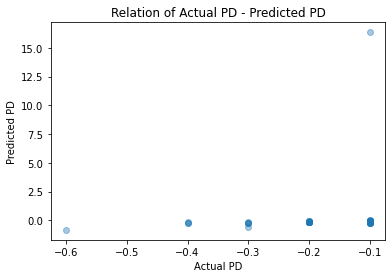

In [27]:
y_hat = tf.matmul(x_test * x_test, w1_pred) + tf.matmul(x_test, w2_pred) + bias

plt.scatter(y_test, y_hat, alpha = 0.4)
plt.xlabel('Actual PD')
plt.ylabel('Predicted PD')
plt.title('Relation of Actual PD - Predicted PD')
plt.show()

In [28]:
mse = mean_squared_error(y_test, y_hat)
rmse = np.sqrt(mse)

print(rmse)

1.6235976
